## statsmodels
### University of Virginia
### Programming for Data Science
### Last Updated: October 3, 2021
---  

### PREREQUISITES
- variables
- data types
- pandas

### SOURCES 
- **Python for Data Analysis, Chapter X (be sure to read this)**
- https://www.statsmodels.org/stable/index.html

### OBJECTIVES
- Introduce some basic functionality of the `statsmodels` package
- Illustrate how to fit a regression model with `statsmodels`
 


### CONCEPTS
- `statsmodels` interfaces


---

### Introduction to statsmodels 

The `statsmodels` allows users to build various statistical models including:

- ols regression
- gls regression
- wls regression
- linear mixed-effects models

The model output looks similar to the R programming language. It includes standard errors and p-values, for example.  
This is in contrast to the `scikit-learn` module, which has a focus on machine learning and omits standard errors and p-values.

`statsmodels` supports two different interfaces for constructing models: 

- R-style formulas using the `statsmodels.formula.api`
- pandas dataframes using the `statsmodels.api` package

### OLS Regression Example

We briefly outline some functionality with a regression example.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Import a wine quality dataset from UCI. Note the separator ; or the data doesn't parse into columns.

In [10]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
df = pd.read_csv(url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Treat `quality` as response. Let's look at the counts of unique values.

In [13]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Notice there is a relatively small number of levels. This could be modeled using a classification model or a regression model.  
For predictions from a regression model, it makes sense to round and clip values, yielding a result in [3,9].

**FORMULA INTERFACE**

We can pass an R-style formula to specify the model

Fit regression model and print a summary:

In [72]:
results = smf.ols('quality ~ alcohol + pH', data=df).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     581.3
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          3.09e-227
Time:                        11:35:39   Log-Likelihood:                -5832.7
No. Observations:                4898   AIC:                         1.167e+04
Df Residuals:                    4895   BIC:                         1.169e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7422      0.250      6.966      0.0

List the attributes in the model

In [19]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


Inspect some attributes

In [41]:
# model parameters
results.params

Intercept    1.742207
alcohol      0.309342
pH           0.277016
dtype: float64

Extract parameter values using index value or name (they are stored in a pandas Series):

In [65]:
# pH
results.params[2]

0.2770157949462014

In [66]:
results.params['pH']

0.2770157949462014

Diagnostics: plot fitted vs residuals

Text(0, 0.5, 'fitted')

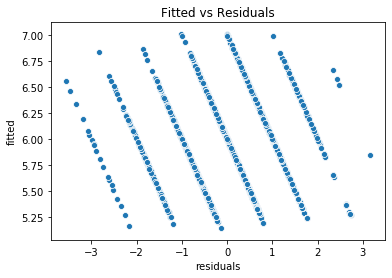

In [67]:
sns.scatterplot(results.resid, results.fittedvalues)
plt.title('Fitted vs Residuals')
plt.xlabel('residuals')
plt.ylabel('fitted')

**PANDAS INTERFACE**  
We can subset the pandas dataframe to pass data to the model fitter

In [73]:
# build the design matrix X
X = df[['alcohol','pH']]

# append column of 1s to design matrix for intercept term
X = sm.add_constant(X) 
print('X:\n', X.values)

# build the response vector y
y = df.quality

print('\n')
print('y:\n', y.values)

X:
 [[ 1.    8.8   3.  ]
 [ 1.    9.5   3.3 ]
 [ 1.   10.1   3.26]
 ...
 [ 1.    9.4   2.99]
 [ 1.   12.8   3.34]
 [ 1.   11.8   3.26]]


y:
 [6 6 6 ... 6 7 6]


Fit the regression model and show the results. They match the results from the formula interface, as expected.

In [74]:
results = sm.OLS(y, X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     581.3
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          3.09e-227
Time:                        11:36:11   Log-Likelihood:                -5832.7
No. Observations:                4898   AIC:                         1.167e+04
Df Residuals:                    4895   BIC:                         1.169e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7422      0.250      6.966      0.0

---

#### TRY FOR YOURSELF
Do the following:

- Import your own dataset
- Use `statsmodels` to fit a model using the formula interface
- Use `statsmodels` to fit a model using the pandas interface
- Do some diagnostic checking (e.g., plot the residuals from the model)

---  